# Testing the updraft-downdraft coupling functions

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import sys

import metpy.calc as mpcalc
from metpy.units import units

from dparcel.thermo import (saturation_specific_humidity,
                            equivalent_potential_temperature)
sys.path.append('../convection_scheme')
from coupler import Coupler

## Precipitation-driven

In [7]:
def plot():
    (updraft, theta_e_downdraft,
     max_precip_downdraft) = coupler.precipitation_driven(
        i_init_up, t_pert, q_pert, l_initial, w_initial_up,
        epsilon, dnu_db, drag, l_crit, basic=True)

    theta_e_env = np.where(
        (np.isnan(updraft.velocity)
         & np.isnan(theta_e_downdraft.velocity)
         & np.isnan(max_precip_downdraft.velocity)),
        np.nan, theta_e)
    theta_e_up = equivalent_potential_temperature(
        pressure, updraft.temperature, updraft.specific_humidity)
    theta_e_up = np.where(np.isnan(updraft.velocity), np.nan, theta_e_up)
    theta_e_down1 = equivalent_potential_temperature(
        pressure, theta_e_downdraft.temperature,
        theta_e_downdraft.specific_humidity)
    theta_e_down1 = np.where(
        np.isnan(theta_e_downdraft.velocity), np.nan, theta_e_down1)
    theta_e_down2 = equivalent_potential_temperature(
        pressure, max_precip_downdraft.temperature,
        max_precip_downdraft.specific_humidity)
    theta_e_down2 = np.where(
        np.isnan(max_precip_downdraft.velocity), np.nan, theta_e_down2)

    fig, axes = plt.subplots(1, 2, figsize=(8,5))

    axes[0].plot(updraft.velocity, height)
    axes[0].plot(theta_e_downdraft.velocity, height)
    axes[0].plot(max_precip_downdraft.velocity, height)
    axes[0].grid()
    axes[0].set(xlabel='Velocity (m/s)', ylabel='Height (m)')

    axes[1].plot(theta_e_env, height, 'k--', label='Environment')
    axes[1].plot(theta_e_up, height, label='Updraft')
    axes[1].plot(theta_e_down1, height, label='Min $\\theta_e$\ndowndraft')
    axes[1].plot(theta_e_down2, height, label='Max precip.\ndowndraft')
    axes[1].grid()
    axes[1].legend()
    axes[1].set(xlabel='$\\theta_e$ (K)', ylabel='')
    axes[1].set_yticklabels([])

    fig.tight_layout()

### Singapore

In [9]:
file = ('test_soundings/48698 WSSS Singapore Observations '
        'at 00Z 01 Dec 2021.txt')
sounding = pd.read_fwf(file, usecols=[0, 1, 2, 3], header=0)
sounding = sounding.to_numpy()
pressure_raw = sounding[:2:-1,0]
height_raw = sounding[:2:-1,1]
temperature_raw = sounding[:2:-1,2]
dewpoint_raw = sounding[:2:-1,3]

pressure = np.arange(pressure_raw[0], pressure_raw[-1], 5)*units.mbar
height = interp1d(pressure_raw, height_raw)(pressure)*units.meter
height -= height[-1]
temperature = interp1d(pressure_raw, temperature_raw)(pressure)*units.celsius
dewpoint = interp1d(pressure_raw, dewpoint_raw)(pressure)*units.celsius
specific_humidity = mpcalc.specific_humidity_from_dewpoint(pressure, dewpoint)
coupler = Coupler(pressure, height, temperature, specific_humidity)

theta_e = equivalent_potential_temperature(
    pressure, temperature, specific_humidity)

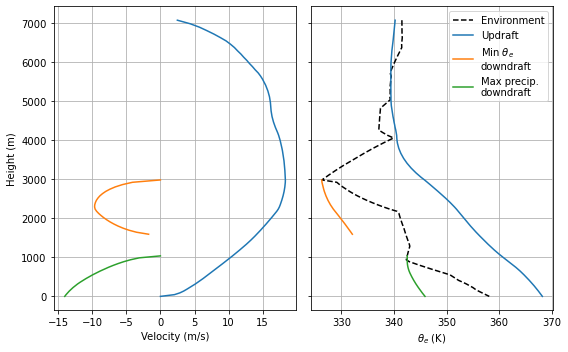

In [10]:
# updraft parameters
i_init_up = pressure.size - 1
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

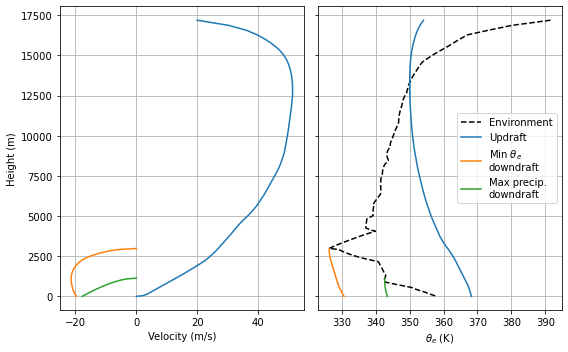

In [11]:
# updraft parameters
i_init_up = pressure.size - 1
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.1/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

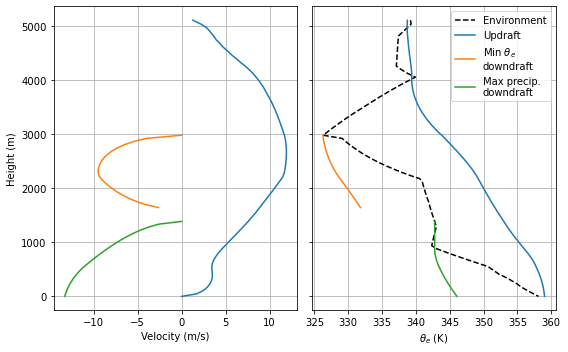

In [12]:
# updraft parameters
i_init_up = pressure.size - 1
t_pert = 1.0*units.delta_degC
q_pert = 0*units.dimensionless
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

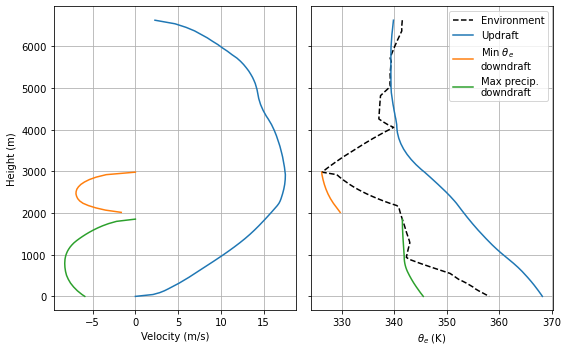

In [13]:
# updraft parameters
i_init_up = pressure.size - 1
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 4.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

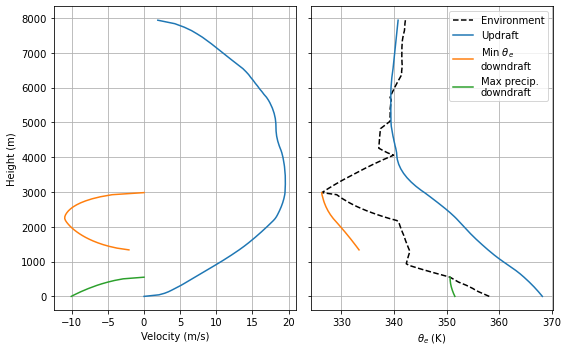

In [14]:
# updraft parameters
i_init_up = pressure.size - 1
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 0.5e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

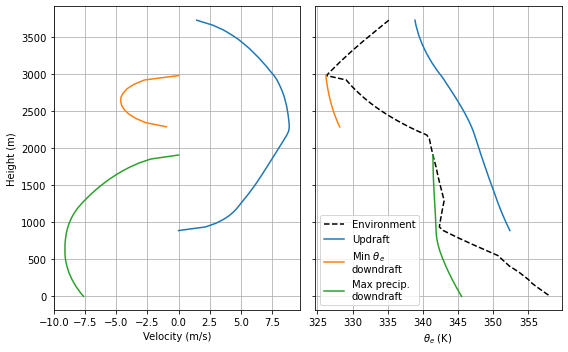

In [15]:
# updraft parameters
i_init_up = pressure.size - 20
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)/1.5
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

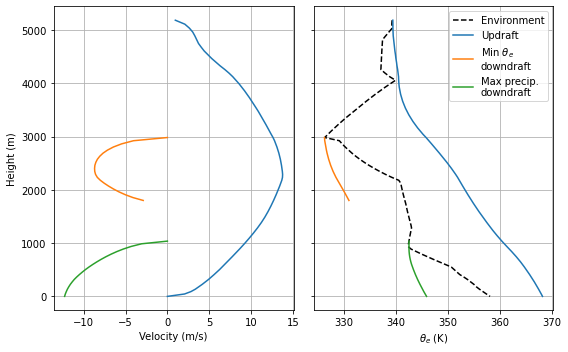

In [16]:
# updraft parameters
i_init_up = pressure.size - 1
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0.25/units.km

plot()

### Williamtown

In [17]:
file = ('test_soundings/94776 YSWM Williamtown Amo Raaf Observations '
        'at 00Z 21 Dec 2021.txt')
sounding = pd.read_fwf(file, usecols=[0, 1, 2, 3], header=0)
sounding = sounding.to_numpy()
pressure_raw = sounding[:2:-1,0]
height_raw = sounding[:2:-1,1]
temperature_raw = sounding[:2:-1,2]
dewpoint_raw = sounding[:2:-1,3]

pressure = np.arange(pressure_raw[0], pressure_raw[-1], 5)*units.mbar
height = interp1d(pressure_raw, height_raw)(pressure)*units.meter
height -= height[-1]
temperature = interp1d(pressure_raw, temperature_raw)(pressure)*units.celsius
dewpoint = interp1d(pressure_raw, dewpoint_raw)(pressure)*units.celsius
specific_humidity = mpcalc.specific_humidity_from_dewpoint(pressure, dewpoint)
coupler = Coupler(pressure, height, temperature, specific_humidity)

theta_e = equivalent_potential_temperature(
    pressure, temperature, specific_humidity)

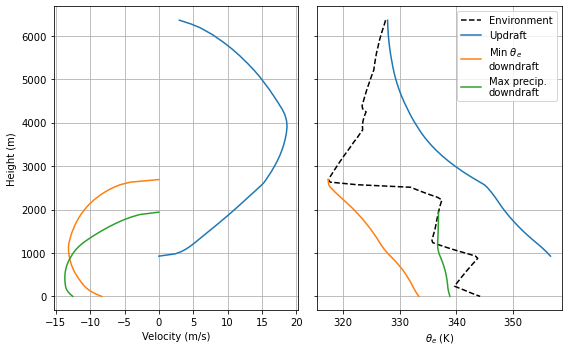

In [18]:
# updraft parameters
i_init_up = pressure.size - 20
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

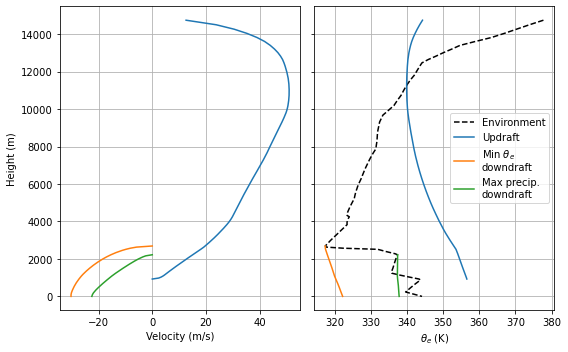

In [19]:
# updraft parameters
i_init_up = pressure.size - 20
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.1/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

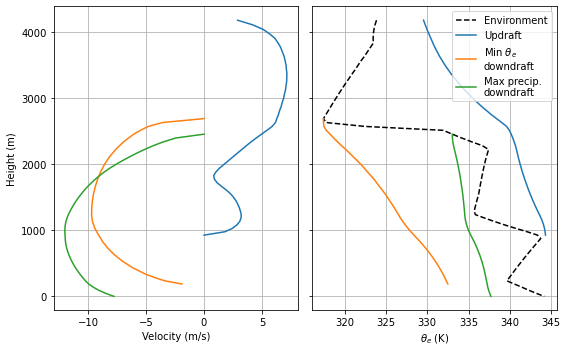

In [20]:
# updraft parameters
i_init_up = pressure.size - 20
t_pert = 1.0*units.delta_degC
q_pert = 0*units.dimensionless
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

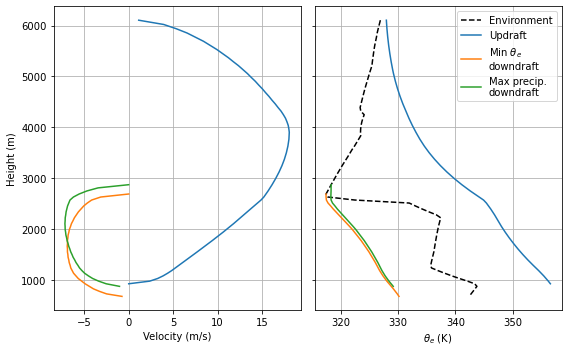

In [21]:
# updraft parameters
i_init_up = pressure.size - 20
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 4.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

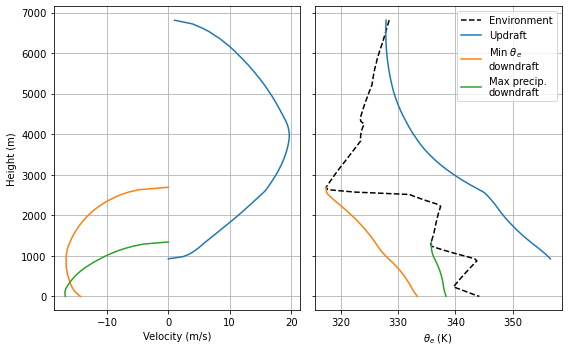

In [22]:
# updraft parameters
i_init_up = pressure.size - 20
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 0.5e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

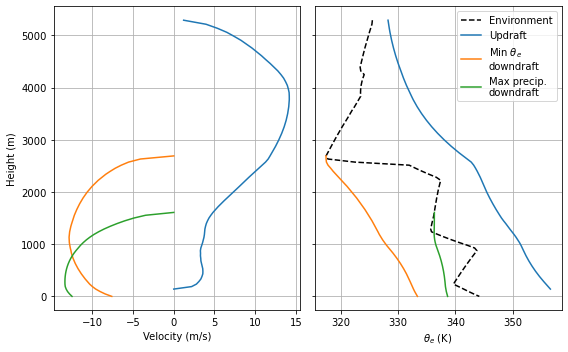

In [23]:
# updraft parameters
i_init_up = pressure.size - 4
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)/1.5
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

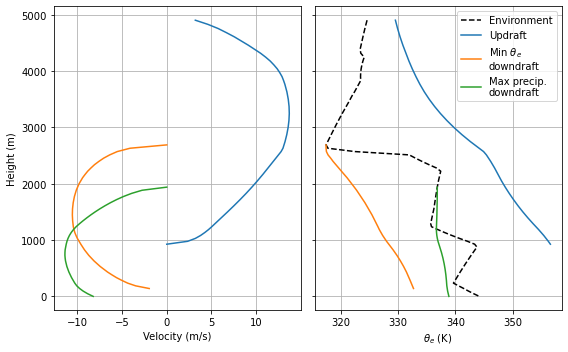

In [24]:
# updraft parameters
i_init_up = pressure.size - 20
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0.25/units.km

plot()

## Overshooting

In [28]:
def plot():
    updraft, downdraft = coupler.overshooting(
        i_init_up, t_pert, q_pert, l_initial, w_initial_up,
        epsilon, dnu_db, drag, l_crit)

    theta_e_env = np.where(
        (np.isnan(updraft.velocity) & np.isnan(downdraft.velocity)),
        np.nan, theta_e)
    theta_e_up = equivalent_potential_temperature(
        pressure, updraft.temperature, updraft.specific_humidity)
    theta_e_up = np.where(np.isnan(updraft.velocity), np.nan, theta_e_up)
    theta_e_down = equivalent_potential_temperature(
        pressure, downdraft.temperature, downdraft.specific_humidity)
    theta_e_down = np.where(
        np.isnan(downdraft.velocity), np.nan, theta_e_down)

    fig, axes = plt.subplots(1, 2, figsize=(8,5))

    axes[0].plot(updraft.velocity, height)
    axes[0].plot(downdraft.velocity, height)
    axes[0].grid()
    axes[0].set(xlabel='Velocity (m/s)', ylabel='Height (m)')

    axes[1].plot(theta_e_env, height, 'k--', label='Environment')
    axes[1].plot(theta_e_up, height, label='Updraft')
    axes[1].plot(theta_e_down, height, label='Downdraft')
    axes[1].grid()
    axes[1].legend()
    axes[1].set(xlabel='$\\theta_e$ (K)', ylabel='')
    axes[1].set_yticklabels([])

    fig.tight_layout()

### Singapore

In [26]:
file = ('test_soundings/48698 WSSS Singapore Observations '
        'at 00Z 01 Dec 2021.txt')
sounding = pd.read_fwf(file, usecols=[0, 1, 2, 3], header=0)
sounding = sounding.to_numpy()
pressure_raw = sounding[:2:-1,0]
height_raw = sounding[:2:-1,1]
temperature_raw = sounding[:2:-1,2]
dewpoint_raw = sounding[:2:-1,3]

pressure = np.arange(pressure_raw[0], pressure_raw[-1], 5)*units.mbar
height = interp1d(pressure_raw, height_raw)(pressure)*units.meter
height -= height[-1]
temperature = interp1d(pressure_raw, temperature_raw)(pressure)*units.celsius
dewpoint = interp1d(pressure_raw, dewpoint_raw)(pressure)*units.celsius
specific_humidity = mpcalc.specific_humidity_from_dewpoint(pressure, dewpoint)
coupler = Coupler(pressure, height, temperature, specific_humidity)

theta_e = equivalent_potential_temperature(
    pressure, temperature, specific_humidity)

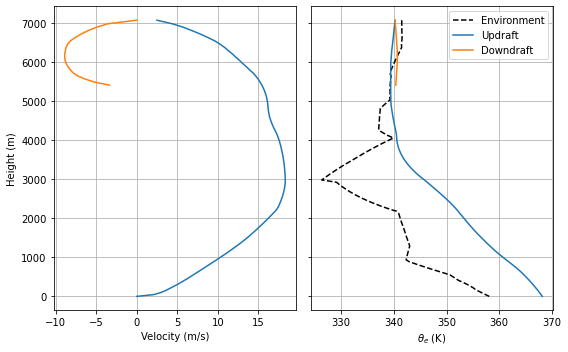

In [29]:
# updraft parameters
i_init_up = pressure.size - 1
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.5/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

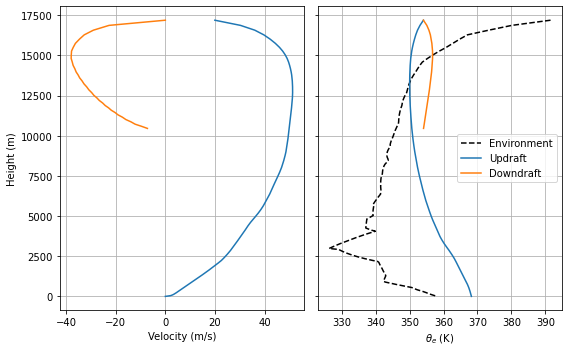

In [30]:
# updraft parameters
i_init_up = pressure.size - 1
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.1/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0/units.km

plot()

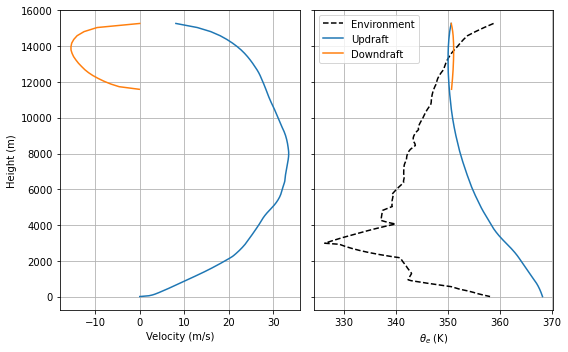

In [31]:
# updraft parameters
i_init_up = pressure.size - 1
t_pert = 1.0*units.delta_degC
q_pert = (
    saturation_specific_humidity(pressure[i_init_up], temperature[i_init_up])
     - specific_humidity[i_init_up]
)
l_initial = 0*units.dimensionless
l_crit = 2.0e-3*units.dimensionless

# shared parameters
w_initial_up = 0*units.meter/units.second
w_initial_down = 0*units.meter/units.second
epsilon = 0.1/units.km
dnu_db = 5e-2*units.second**2/units.meter**2
drag = 0.1/units.km

plot()